# Function transformer is used to convert the distribution of the data to the normal Distrubition
# Some of the funtion transformer are:
## a.Log transform(log x) : used if the data is right skewed
## b.reciprocal transform(1/x)
## c.Square transform(x^2) : used if data is left skewed
### d.Square root transform 

In [283]:
import pandas as pd
import numpy as np

import scipy.stats as stats     #To draw the QQ plot    

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [284]:
df = sns.load_dataset('titanic')

In [285]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [286]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [287]:
df.drop(columns=[ 'pclass', 'sex', 'sibsp', 'parch',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],inplace=True)

In [288]:
df.head(2)

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [289]:
df.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

## Since there are nan values in age column we impute with mean

In [290]:
df['age'].fillna(df['age'].mean(),inplace=True)

C:\Users\Prabal Kuinkel\AppData\Local\Temp\ipykernel_10116\1492264711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


In [291]:
x=df.iloc[:,1:3]
y=df.iloc[:,0:1]
#x constains age, fare and y contains survived

## Train test split


In [292]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [293]:
x_train.isnull().sum()

age     0
fare    0
dtype: int64

## Now we look the distribution of age column using histplot with kde as true and QQ plot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


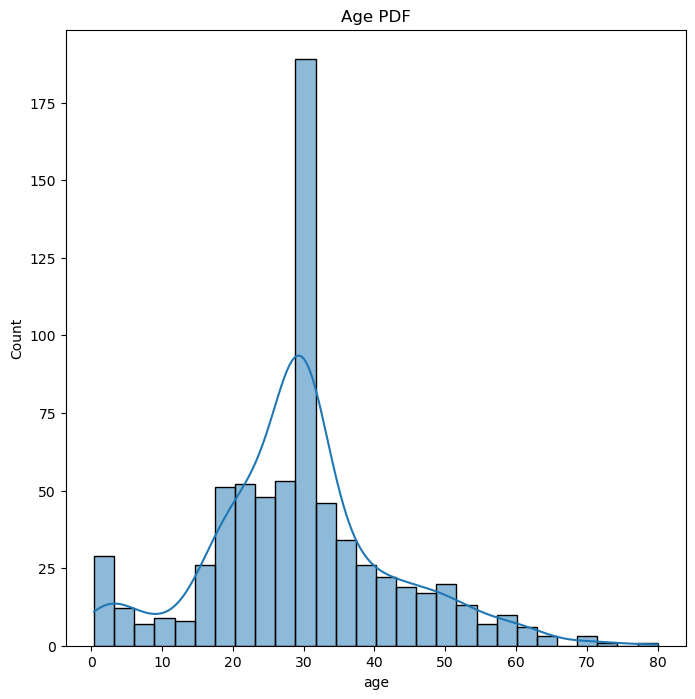

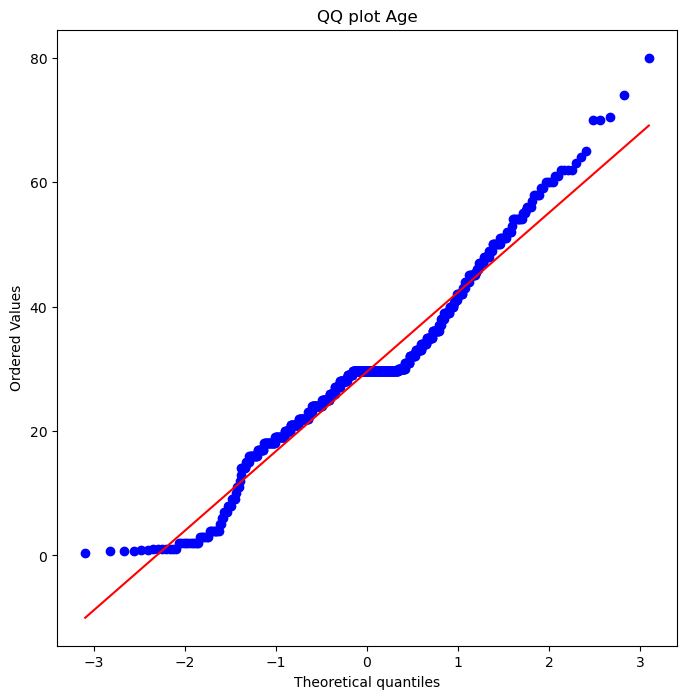

In [294]:
# To draw the distribution plot for the Age column to identify the distribution 
plt.figure(figsize=(8,8))
sns.histplot(data=x_train,x='age',kde=True)
plt.title('Age PDF')
plt.show()

# To draw the QQ plot for the Age columnto identify the distribution 
plt.figure(figsize=(8,8))
stats.probplot(x_train['age'],dist='norm',plot=plt)
plt.title('QQ plot Age')
plt.show()



### Age column is not exactly Normally distributed but since the data points are aound the straight line , Age column is somewhat Normally distributed so no need to apply any transformation

## Now we look the distribution of fare column using histplot with kde as true and QQ plot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


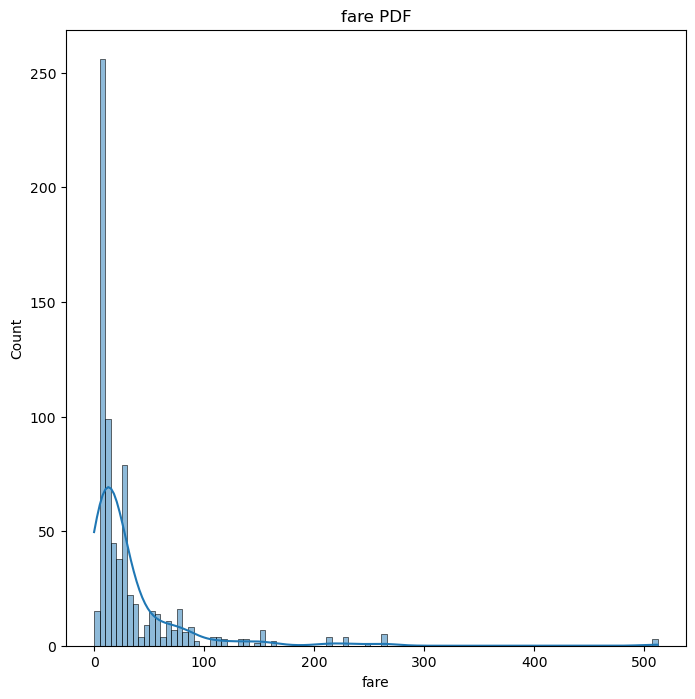

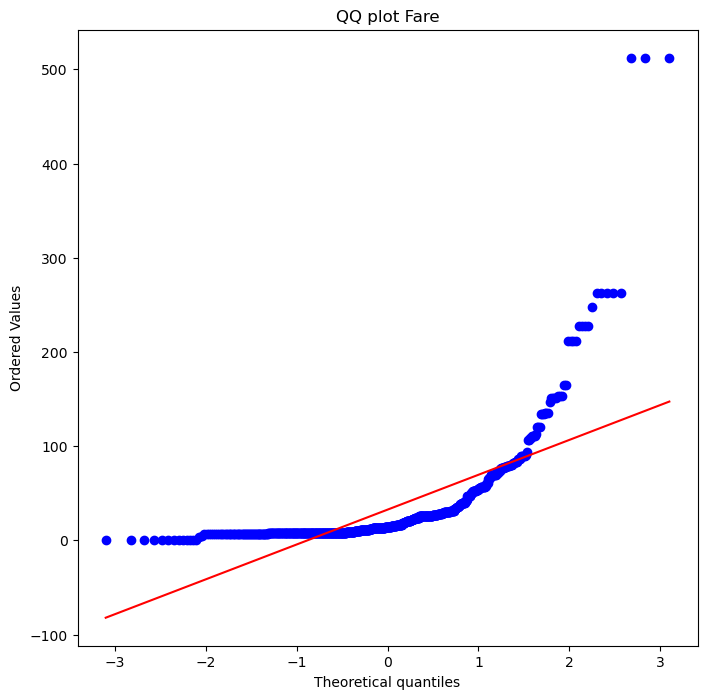

In [295]:
# To draw the distribution plot for the fare column to identify the distribution 
plt.figure(figsize=(8,8))
sns.histplot(data=x_train,x='fare',kde=True)
plt.title('fare PDF')
plt.show()

# To draw the QQ plot for the Fare columnto identify the distribution 
plt.figure(figsize=(8,8))
stats.probplot(x_train['fare'],dist='norm',plot=plt)
plt.title('QQ plot Fare')
plt.show()

## We can see that fare column is right skewed (because some customers in titanic data set has spend higher amount to purchase the tickets) . So we will apply log transform to fare column later

# We will train the model with logistic Regression and decision tree without applying any transformation to fare column to see the performance of both model without transformation

In [296]:
# Creating object of both logistic regression model and decsion tree model
logistic_model = LogisticRegression()
decision_model = DecisionTreeClassifier()

In [297]:
#Training the logistic model
logistic_model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [298]:
# Training the decison tree model
decision_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [299]:
# Testing the model
y_predict_logistic= logistic_model.predict(x_test)
y_predict_decision = decision_model.predict(x_test)

In [300]:
# Accuracy
print("Accuracy of logistic regression: " , accuracy_score(y_test,y_predict_logistic))
print("Accuracy of decision tree: " , accuracy_score(y_test,y_predict_decision))

Accuracy of logistic regression:  0.6480446927374302
Accuracy of decision tree:  0.664804469273743


### The accuracy(without applying transformation) of logistic regression is 64 % and accuracy of decision tree is 67 %

# Now we will apply log transformation in Fare column and again train the 2 model

In [301]:
# Applying log transform to fare column using column transformer
ct1 = ColumnTransformer(transformers=[
    ('log_transform_fare',FunctionTransformer(np.log1p),['fare'])
],remainder='passthrough')

## Difference between np.logp and np.log1p
## In np.logp it simply applies log function to the data(x). It may cause probelm if x is 0 i.e log(0)
## In np.log1p it simply adds 1 in the data then it will become (x+1) then applies log i.e log(x+1) . So never log(0) probelm arises


In [302]:
# Applying log transform to both x_train and x_test
x_train_transform=ct1.fit_transform(x_train)
x_test_transform=ct1.transform(x_test)
x_train_transform

array([[ 3.38439026, 45.5       ],
       [ 2.63905733, 23.        ],
       [ 2.18885633, 32.        ],
       ...,
       [ 2.71524426, 41.        ],
       [ 4.79579055, 14.        ],
       [ 4.36038795, 21.        ]])

In [303]:
# Converting into data frame
x_train_transform = pd.DataFrame(x_train_transform,columns=['fare','age'])
x_test_transform = pd.DataFrame(x_test_transform,columns=['fare','age'])

x_train_transform

,fare,age
0,3.384390,45.500000
1,2.639057,23.000000
2,2.188856,32.000000
3,2.180892,26.000000
4,3.474293,6.000000
...,...,...
707,2.157559,21.000000
708,3.465736,29.699118
709,2.715244,41.000000
710,4.795791,14.000000


## Now again checking the distribution of fare column before and after log transform

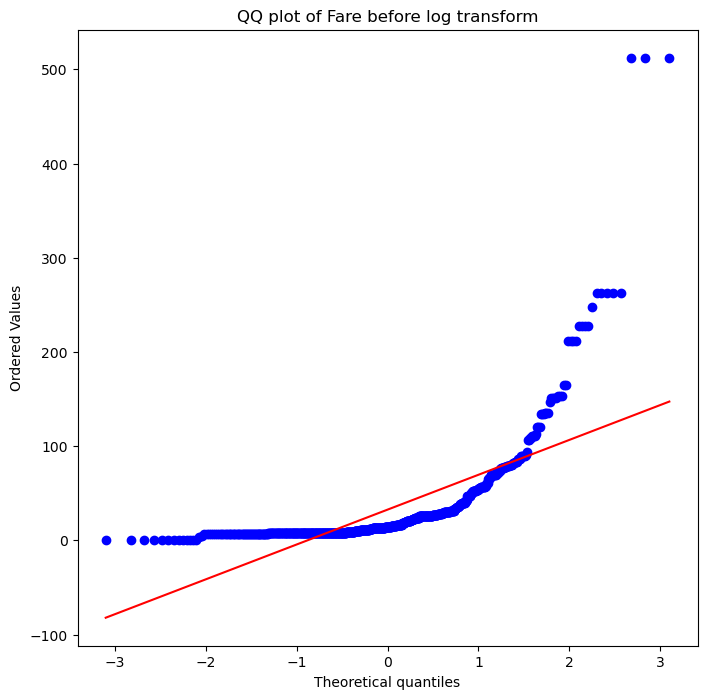

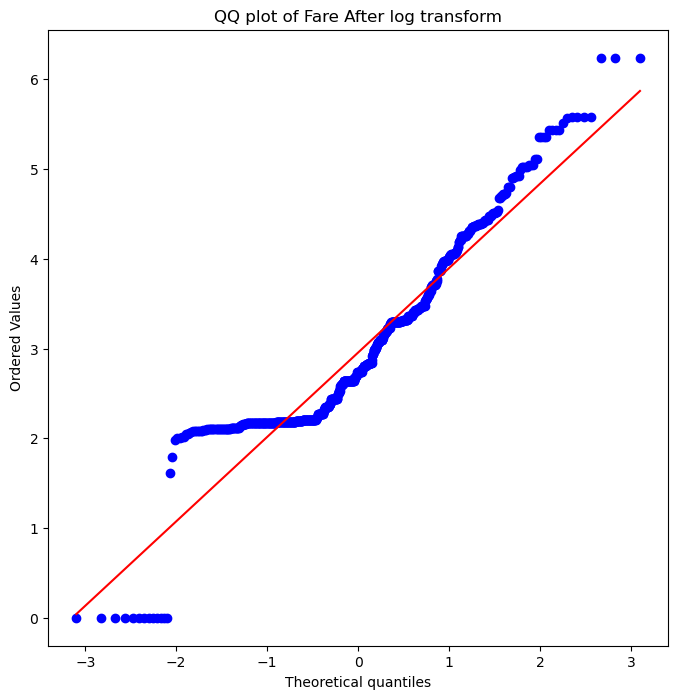

In [324]:
# To draw the distribution plot for the fare column to identify the distribution 
plt.figure(figsize=(8,8))
stats.probplot(x_train['fare'],dist='norm',plot=plt)
plt.title('QQ plot of Fare before log transform')
plt.show()

# To draw the QQ plot for the Fare columnto after applyying log transform identify the distribution 
plt.figure(figsize=(8,8))
stats.probplot(x_train_transform['fare'],dist='norm',plot=plt)
plt.title('QQ plot of Fare After log transform')
plt.show()


## We can see that after log transform the fare column is slighty normally distributed

## Again training 2 model (logistic regression and decision tree) after applying log transform in fare column

In [305]:
logistic_model2 = LogisticRegression()
decision_model2 = DecisionTreeClassifier()

In [306]:
#Training the logistic model
logistic_model2.fit(x_train_transform,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [307]:
# Training the decison tree model
decision_model2.fit(x_train_transform,y_train)

DecisionTreeClassifier()

In [308]:
# Testing the model
y_predict_logistic2= logistic_model2.predict(x_test_transform)
y_predict_decision2 = decision_model2.predict(x_test_transform)

In [309]:
# Accuracy
print("Accuracy of logistic regression: " , accuracy_score(y_test,y_predict_logistic2))
print("Accuracy of decision tree: " , accuracy_score(y_test,y_predict_decision2))

Accuracy of logistic regression:  0.6703910614525139
Accuracy of decision tree:  0.659217877094972


## Before applying log transfrom the accuary of logistic regression is:64.8% and that of decision tree is :67 %
## After applying log transfrom the accuary of logistic regression is:67% and that of decision tree is :66.4 %

### From above we noticed that converting the data into normal distribution is not necessary for the decision tree model as there is no improvement in the performance of the model . But converting to normal distribution is benificial for linear model like logistic regression as there is improvement in the accuracy of the model (from 64.8% to 67%)


## Cross validation for logistic regression and decision tree 

In [319]:
from sklearn.model_selection import cross_val_score
crossval_logistic = cross_val_score(logistic_model2, x_train_transform, y_train, cv=10).mean()
crossval_decision = cross_val_score(decision_model2, x_train_transform, y_train, cv=10).mean()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [320]:
print('cross_validation score of logistic regression ', crossval_logistic)
print('cross_validation score of Decision tree ', crossval_decision)

cross_validation score of logistic regression  0.6572378716744913
cross_validation score of Decision tree  0.6207942097026604
